In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('spam.tsv', sep='\t', names=['label', 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.columns

Index(['label', 'message'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [6]:
ham_msg = df[df.label =='ham']
ham_text = " ".join(ham_msg.message.to_numpy().tolist())


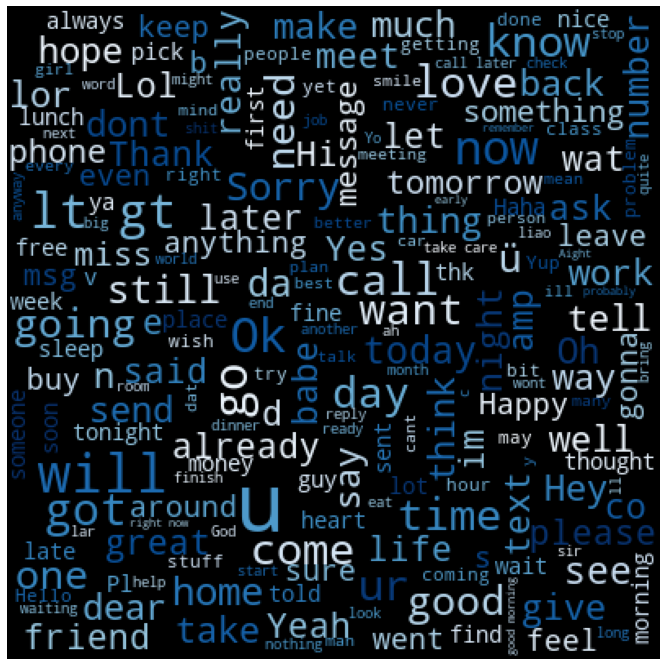

In [7]:
ham_cloud = WordCloud(width = 400, height = 400, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Blues').generate(ham_text)
plt.figure(figsize=(12, 12))
plt.imshow(ham_cloud)
plt.axis('off') 
plt.show()

In [8]:
spam_msg = df[df.label == 'spam']
spam_txt = ' '.join(spam_msg.message.to_numpy().tolist())

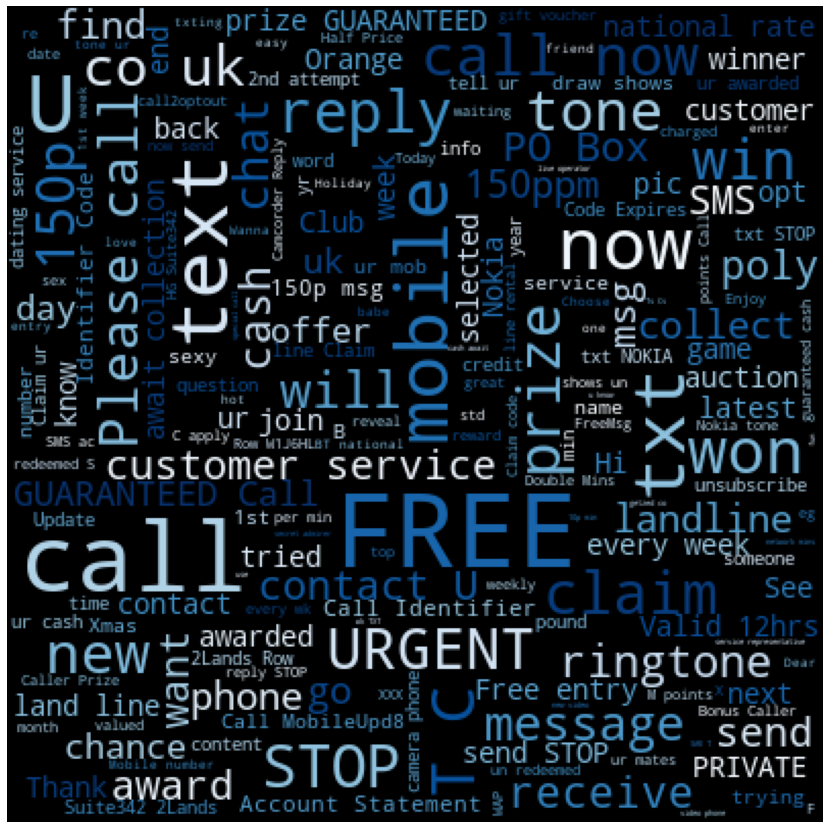

In [9]:
spam_cloud = WordCloud(width = 400, height = 400, stopwords = STOPWORDS, max_font_size = 50, background_color = 'black', colormap = 'Blues').generate(spam_txt)
plt.figure(figsize = (15, 15))
plt.imshow(spam_cloud)
plt.axis('off')
plt.show()

In [10]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


Text(0, 0.5, 'Count')

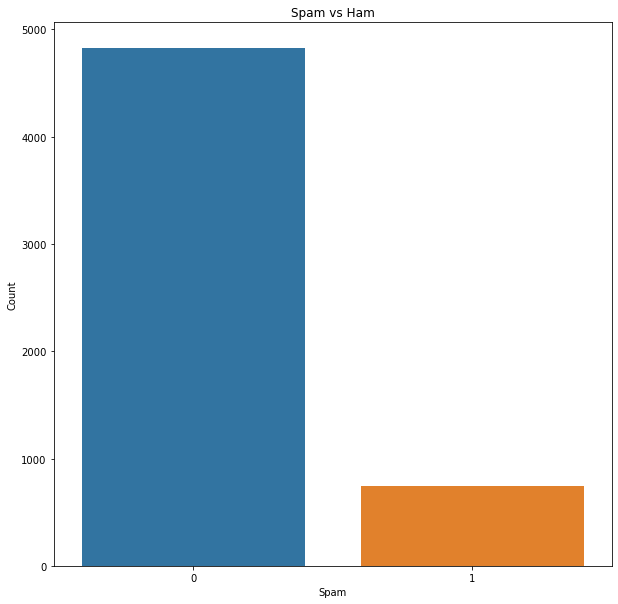

In [11]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'label', data = df)
plt.title('Spam vs Ham')
plt.xlabel('Spam')
plt.ylabel('Count')

In [12]:
spam = df[df['label']==1]
print('Number of Spam records: {}'.format(spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0] - spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [13]:
df.shape[0]

5572

In [14]:
a = int((df.shape[0] - spam.shape[0]) / spam.shape[0])
for i in range(0, a-1):
    df = pd.concat([df, spam])
df.shape

(9307, 2)

Text(0, 0.5, 'Count')

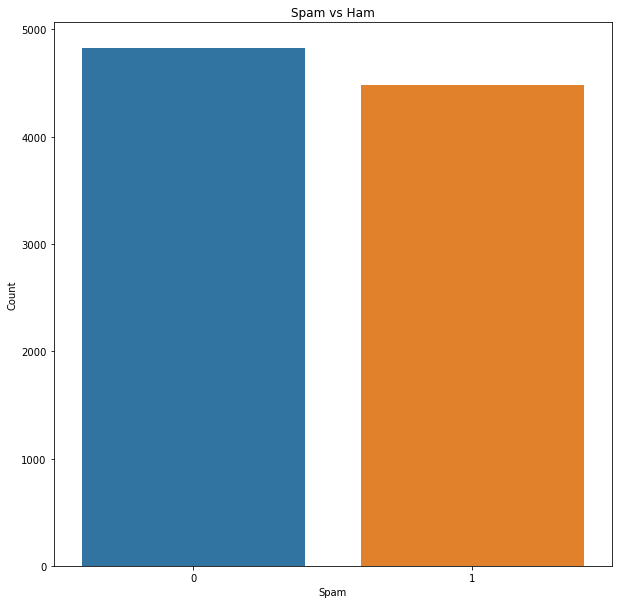

In [15]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'label', data = df)
plt.title('Spam vs Ham')
plt.xlabel('Spam')
plt.ylabel('Count')

In [16]:
bow = []
lemma = WordNetLemmatizer()

for sms in list(df.message):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemmatized_words = [lemma.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemmatized_words)
    bow.append(message)

In [17]:
bow[0:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(max_features = 700)
vectors = tfidf.fit_transform(bow).toarray()
feature_names = tfidf.get_feature_names()

In [20]:
X = pd.DataFrame(vectors, columns = feature_names)
y = df['label']

In [21]:
X

,able,ac,access,account,activate,actually,address,admirer,adult,afternoon,...,ya,yeah,year,yes,yesterday,yet,yo,yr,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.295606,0.0,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.236866,0.0,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [25]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(nb, X, y, scoring = 'f1', cv = 10)
print('F-1 score using Naive Bayse: {}'.format(round(cv.mean(), 2)))

F-1 score using Naive Bayse: 0.95


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       959
           1       0.95      0.94      0.94       903

    accuracy                           0.95      1862
   macro avg       0.95      0.95      0.95      1862
weighted avg       0.95      0.95      0.95      1862



In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring = 'f1', cv = 10)
print('F-1 score using Decision Trees: {}'.format(round(cv.mean(), 2)))

F-1 score using Decision Trees: 0.98


In [30]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators = 10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('F-1 using Random Forest: {}'.format(round(cv.mean(), 2)))

F-1 using Random Forest: 1.0


In [34]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



## Random forerst performs quite well 

In [36]:
def predict(sample_msg):
    sample_msg = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = sample_msg)
    sample_msg_words = sample_msg.lower()
    sample_msg_words = sample_msg.split()
    sample_msg_words = [word for word in sample_msg_words if not word in set(stopwords.words('english'))] 
    final_message = [lemma.lemmatize(word) for word in sample_msg_words]
    final_message = ' '.join(final_message)
    msg = tfidf.transform([final_message]).toarray()
    return rf.predict(msg)

In [37]:
sample_msg = "IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out."

if predict(sample_msg):
    print('This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a SPAM message.


In [38]:
sample_msg = "Hello. We detected fraudulent activity on your Apple iCloud account. To reset password:www.123applesupport/12"
if predict(sample_msg):
    print('This is a SPAM Message.')
else:
    print('This is a HAM (NORMAL) message.')

This is a SPAM Message.


In [39]:
sample_msg = "Should I take you out or eat you out ?"
if predict(sample_msg):
    print('This is a SPAM Message')
else:
    print('This is a HAM (Normal) message')

This is a HAM (Normal) message
